In [ ]:

import ee, folium, geemap

ee.Authenticate()

ee.Initialize(project='fishlake-python')

import matplotlib.pyplot as plt


*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


Get and Visualize the Landsat 8 Input data

In [ ]:
area_of_interest = ee.Geometry.Rectangle([-95.06, 43.85, -95.045, 43.84])

landsat8_collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate('2020-01-01', '2020-12-31').min()

landsat8_collection = landsat8_collection.slice(0,9)

fish_lake_landsat = ee.Image(landsat8_collection).clip(area_of_interest).select("SR_B1", "SR_B2","SR_B3","SR_B4","SR_B5","SR_B6","SR_B7")
#training dataset

#prediction/variable predicted
fish_lake_landcover = ee.ImageCollection("ESA/WorldCover/v100").first()

# A list of pixel values to replace.
from_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 100]

# A corresponding list of replacement values (10 becomes 1, 20 becomes 2, etc).
to_list = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]

# Replace pixel values in the image. If the image is multi-band, only the
# remapped band will be returned. The returned band name is "remapped".
# Input image properties are retained in the output image.
fish_lake_landcover_2_Class = fish_lake_landcover.remap(from_list, to_list, defaultValue=0, bandName='Map')

In [ ]:
def NDWI(image):
    """Calculate NDWI (Normalized Difference Water Index)."""
    green = image.select('SR_B3')  # Green band (Landsat 8)
    nir = image.select('SR_B5')     # NIR band (Landsat 8)
    return green.subtract(nir).divide(green.add(nir)).rename('NDWI')

In [ ]:
def classification(input_data, testing_points, training_points, target_data, num_trees):
  #TRAINING
    # Train the classifier with the specified number of trees.
    trained_classifier = ee.Classifier.smileRandomForest(num_trees).train(
        features=training_points,
        classProperty=target_data,
        inputProperties=input_data.bandNames()  # Use input_data's band names
    )

  #PREDICTION
    # Get the confusion matrix and overall accuracy for the training sample.
    train_accuracy = trained_classifier.confusionMatrix().accuracy().getInfo()

    # Classify the testing points and get the accuracy.
    testing_points_classified = testing_points.classify(trained_classifier)
    test_accuracy = testing_points_classified.errorMatrix('Map', 'classification').accuracy().getInfo()

    return train_accuracy, test_accuracy

# Number of Water Pixels vs. Land Pixels with Graph

According to NCEI,
 - 2023: Warm and Dry
 - 2022: Warm and Dry
 - 2021: Warm with Precipitation
 - 2020: Warm with Precipitation
 - 2019: "wet year, ranking as the second wettest year in the 1895-2019 record, nationally"
 - 2018: Varied; Some places extremely dry; Some places unusually wet
 - 2017: Varied
 - 2016: Varied
 - 2015: Warm and Dry
 https://www.ncei.noaa.gov/access/monitoring/monthly-report/drought/201513

instead of looking at minnesota look at the weather stations
ncei - find station tool

Code with just NDWI

Number of Trees: 1
Training Accuracy: 1
Validation Accuracy: 0.9876543209876543

Number of Trees: 2
Training Accuracy: 1
Validation Accuracy: 0.9876543209876543

Number of Trees: 3
Training Accuracy: 1
Validation Accuracy: 0.9876543209876543

Number of Trees: 4
Training Accuracy: 1
Validation Accuracy: 0.9876543209876543

Number of Trees: 5
Training Accuracy: 1
Validation Accuracy: 0.9876543209876543

Number of Trees: 6
Training Accuracy: 1
Validation Accuracy: 0.9876543209876543

Number of Trees: 7
Training Accuracy: 1
Validation Accuracy: 0.9876543209876543

Number of Trees: 8
Training Accuracy: 1
Validation Accuracy: 0.9876543209876543

Number of Trees: 9
Training Accuracy: 1
Validation Accuracy: 0.9876543209876543

Number of Trees: 10
Training Accuracy: 1
Validation Accuracy: 0.9876543209876543



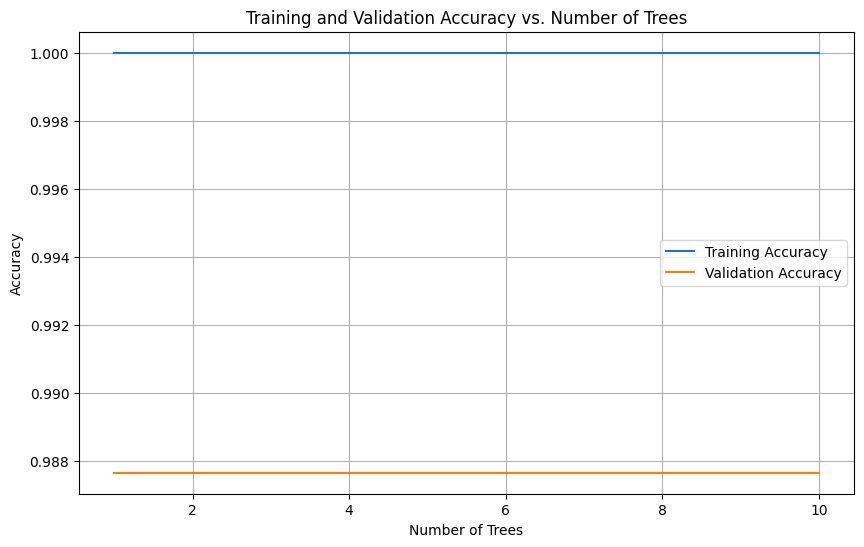


Optimal number of trees: 1

Year: 2015, Number of water pixels: 872.3490196078423
Year: 2015, Number of land pixels: 1193.8627450980393

Year: 2016, Number of water pixels: 860.3490196078423
Year: 2016, Number of land pixels: 1205.862745098039

Year: 2017, Number of water pixels: 863.3490196078423
Year: 2017, Number of land pixels: 1202.862745098039

Year: 2018, Number of water pixels: 968.207843137254
Year: 2018, Number of land pixels: 1098.003921568628

Year: 2019, Number of water pixels: 858.3490196078423
Year: 2019, Number of land pixels: 1207.862745098039

Year: 2020, Number of water pixels: 863.3490196078423
Year: 2020, Number of land pixels: 1202.862745098039

Year: 2021, Number of water pixels: 873.3490196078423
Year: 2021, Number of land pixels: 1192.8627450980393

Year: 2022, Number of water pixels: 867.3490196078423
Year: 2022, Number of land pixels: 1198.862745098039

Year: 2023, Number of water pixels: 860.3490196078423
Year: 2023, Number of land pixels: 1205.862745098039

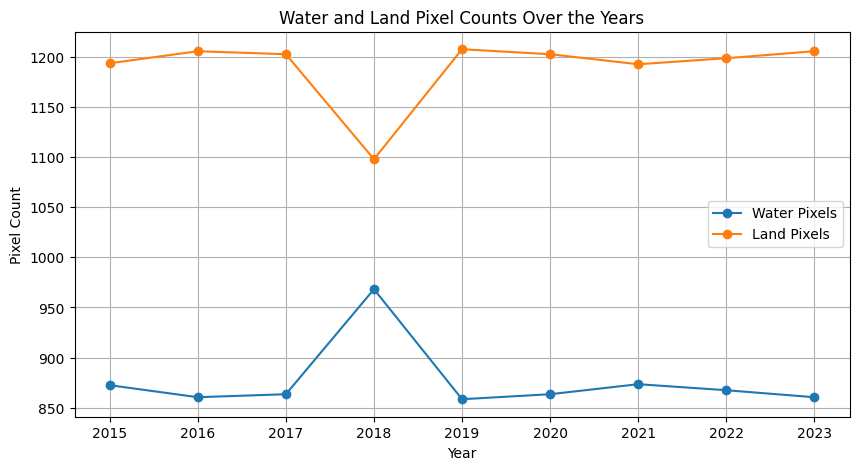

Used Bands: ['NDWI', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7']
Importance Values: [0.495, 0, 0, 0, 0, 0, 0, 0]


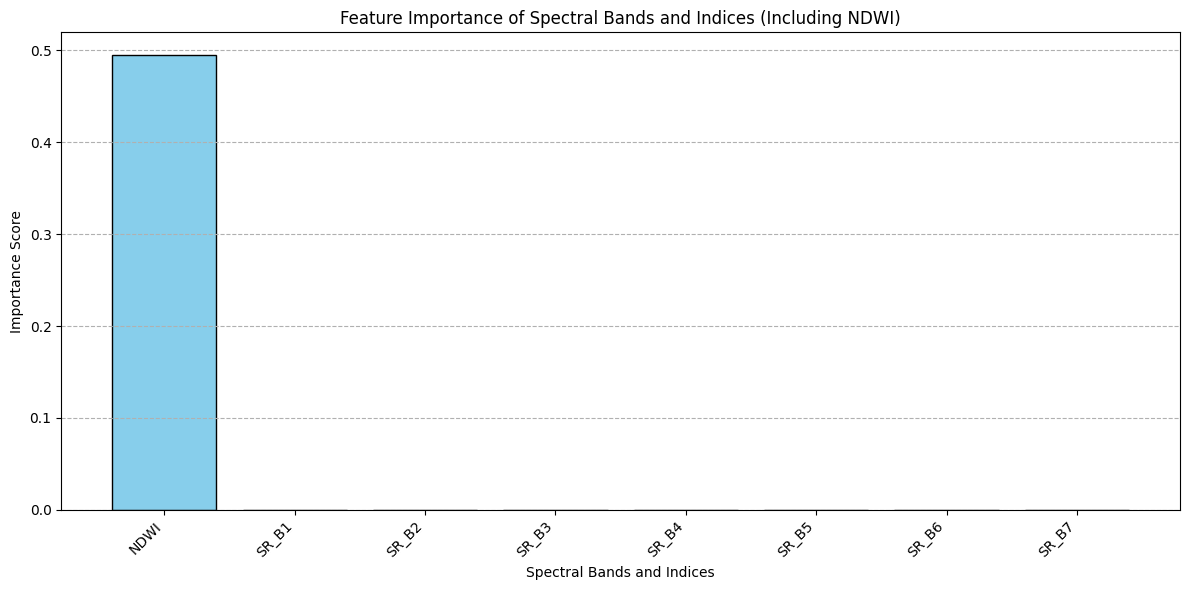

Reflectance statistics (min/max) for the region of interest:
SR_B1: Min = 7336, Max = 9171
SR_B2: Min = 7521, Max = 9464
SR_B3: Min = 8382, Max = 11118
SR_B4: Min = 7851, Max = 11207
SR_B5: Min = 8533, Max = 23891
SR_B6: Min = 7647, Max = 17816
SR_B7: Min = 7490, Max = 14456


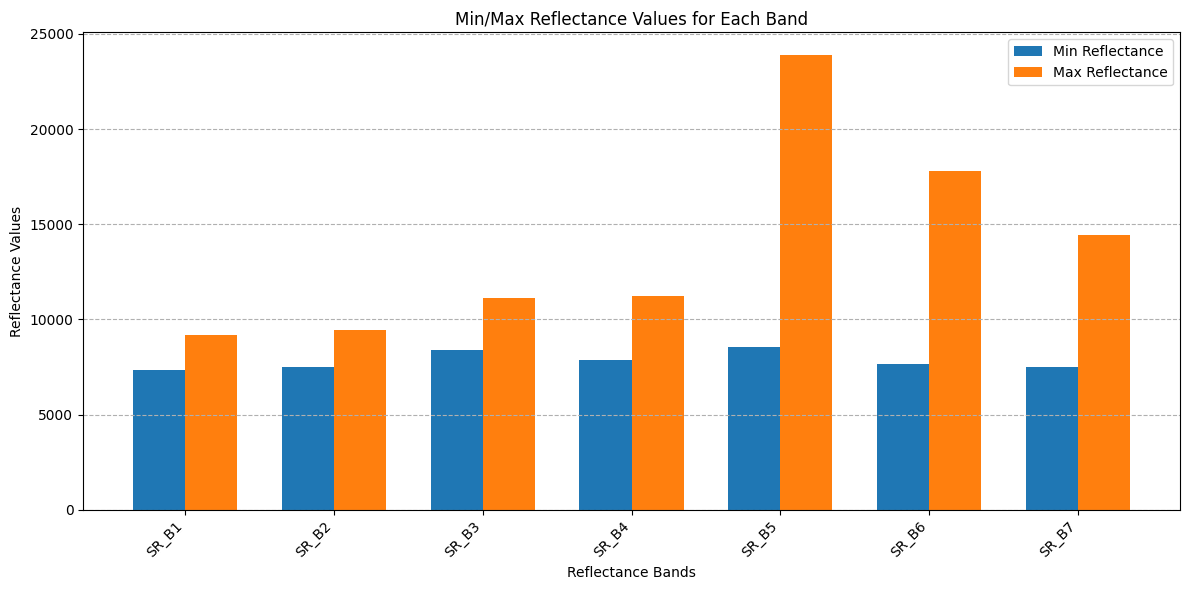

'Results of trained classifier'

Map(center=[43.845, -95.0525], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDa…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ee

# Define the region of interest (ROI)
roi = area_of_interest  # Replace with your defined region of interest

# Define the year to train the model
training_year = 2020

# Train the model only on data from the training year
fish_lake_landsat_train = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')\
    .filterBounds(roi)\
    .filterDate(f'{training_year}-06-01', f'{training_year}-10-01')\
    .median()

# Define the reflectance bands to use for training
reflectance_bands = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7']

# Add only the selected reflectance bands to the stack
restricted_band_stack = fish_lake_landsat_train.select(reflectance_bands)

# Combine only specific spectral indices into a stack for training
restricted_spectral_indices_stack = (NDWI(fish_lake_landsat_train))  # Include NDWI

# Combine reflectance bands and selected spectral indices into one stack
final_stack_train = restricted_band_stack.addBands(restricted_spectral_indices_stack)

# Assuming fish_lake_landcover_2_Class contains the land cover class band
fish_lake_landsat_with_class_train = final_stack_train.addBands(fish_lake_landcover_2_Class.select([0], ['Map']))

# Sample 100 pixels from each land cover class
sample_train = fish_lake_landsat_with_class_train.stratifiedSample(
    numPoints=100, classBand='Map', region=roi, scale=30, geometries=True
)

# Split the sample into training and validation sets
sample_train = sample_train.randomColumn()
training_sample = sample_train.filter(ee.Filter.lte('random', 0.2))
validation_sample = sample_train.filter(ee.Filter.gt('random', 0.2))

# Train and evaluate the Random Forest classifier
num_trees_range = range(1, 11)
training_accuracies = []
validation_accuracies = []

for num_trees in num_trees_range:
    # Assuming classification function is defined
    train_accuracy, validation_accuracy = classification(final_stack_train, validation_sample, training_sample, 'Map', num_trees)
    training_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)

    print(f'Number of Trees: {num_trees}')
    print(f'Training Accuracy: {train_accuracy}')
    print(f'Validation Accuracy: {validation_accuracy}\n')

# Visualize the accuracies
plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, training_accuracies, label='Training Accuracy')
plt.plot(num_trees_range, validation_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

# Train the optimal classifier
optimal_num_trees = num_trees_range[validation_accuracies.index(max(validation_accuracies))]
print(f'\nOptimal number of trees: {optimal_num_trees}\n')
optimal_classifier = ee.Classifier.smileRandomForest(optimal_num_trees).train(
    features=training_sample,
    classProperty='Map',
    inputProperties=final_stack_train.bandNames()
)

# Initialize lists to store results
years = range(2015, 2024)
water_counts = []
land_counts = []

for year in years:
    fish_lake_landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')\
        .filterBounds(roi)\
        .filterDate(f'{year}-06-01', f'{year}-10-01')\
        .median()

    # Restrict to reflectance bands SR_B1 to SR_B7
    fish_lake_landsat = fish_lake_landsat.select(reflectance_bands)

    # Combine spectral indices into a stack for the current year
    spectral_indices_stack_per_year = (NDWI(fish_lake_landsat))  # Include NDWI

    # This ensures the image has all the bands the classifier expects
    img_to_classify = fish_lake_landsat.addBands(spectral_indices_stack_per_year)

    # Classify the image with all necessary bands
    img_classified = img_to_classify.classify(optimal_classifier)

    # Count the number of water and land pixels
    water_pixels = img_classified.eq(1).reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=roi,
        scale=30,
        maxPixels=1e9
    ).get('classification')

    land_pixels = img_classified.eq(0).reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=roi,
        scale=30,
        maxPixels=1e9
    ).get('classification')

    water_count = ee.Number(water_pixels).getInfo()
    land_count = ee.Number(land_pixels).getInfo()

    water_counts.append(water_count)
    land_counts.append(land_count)

    print(f'Year: {year}, Number of water pixels: {water_count}')
    print(f'Year: {year}, Number of land pixels: {land_count}\n')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(years, water_counts, label='Water Pixels', marker='o')
plt.plot(years, land_counts, label='Land Pixels', marker='o')
plt.title('Water and Land Pixel Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('Pixel Count')
plt.legend()
plt.grid(True)
plt.show()

# Step 1: Extract Feature Importance from the Classifier
feature_importance = optimal_classifier.explain().get('importance').getInfo()

# Step 2: Extract NDWI and Other Bands Dynamically
used_bands = list(feature_importance.keys())  # Get all features (bands/indices) used in training
importance_values = list(feature_importance.values())  # Corresponding importance values

# Print for Debugging
print("Used Bands:", used_bands)
print("Importance Values:", importance_values)

# Step 3: Visualize Feature Importance Including NDWI
plt.figure(figsize=(12, 6))
plt.bar(used_bands, importance_values, color='skyblue', edgecolor='black')
plt.title('Feature Importance of Spectral Bands and Indices (Including NDWI)')
plt.xlabel('Spectral Bands and Indices')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()



# Ensure reflectance bands work correctly
reflectance_stats = fish_lake_landsat_train.reduceRegion(
    reducer=ee.Reducer.minMax(),
    geometry=roi,
    scale=30,
    maxPixels=1e9
).getInfo()

# Print the reflectance statistics to verify correctness
print("Reflectance statistics (min/max) for the region of interest:")
for band in reflectance_bands:
    min_val = reflectance_stats[f'{band}_min']
    max_val = reflectance_stats[f'{band}_max']
    print(f'{band}: Min = {min_val}, Max = {max_val}')

# Plot the reflectance band statistics as a bar chart
band_names = [f'{band}' for band in reflectance_bands]  # Band names
min_values = [reflectance_stats[f'{band}_min'] for band in reflectance_bands]  # Min values
max_values = [reflectance_stats[f'{band}_max'] for band in reflectance_bands]  # Max values

plt.figure(figsize=(12, 6))
bar_width = 0.35  # Width of the bars
index = np.arange(len(band_names))

plt.bar(index, min_values, bar_width, label='Min Reflectance')
plt.bar(index + bar_width, max_values, bar_width, label='Max Reflectance')

plt.xlabel('Reflectance Bands')
plt.ylabel('Reflectance Values')
plt.title('Min/Max Reflectance Values for Each Band')
plt.xticks(index + bar_width / 2, band_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()
display('Results of trained classifier', optimal_classifier.explain())


# Define visualization parameters.
class_vis = {
    'min': 0,
    'max': 1,
    'palette': ['#ffff4c', '#0096a0'],  # 0: non-water, 1: water
}

# Create a map.
m = geemap.Map()
m.set_center(-95.0525, 43.845, 15)  # Center the map on the area of interest.

# Add layers to the map.
m.addLayer(fish_lake_landsat_train, {'bands': ['SR_B3', 'SR_B5'], 'min': 0, 'max': 0.3}, 'Landsat 8 Image')  # use the correct band names
m.addLayer(fish_lake_landcover_2_Class, class_vis, 'Land Cover (Water vs Non-Water)')
m.addLayer(roi, {'color': 'white'}, 'ROI', False, 0.5)
m.addLayer(training_sample, {'color': 'black'}, 'Training sample', False)
m.addLayer(validation_sample, {'color': 'white'}, 'Validation sample', False)

# Display the map.
m
